# PRAKTIKUM 1

In [ ]:
import numpy as np

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter
input_size = 2
hidden_size = 2
output_size = 1
lr = 0.1

# Inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Fungsi aktivasi
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training
for epoch in range(10000):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Hitung error
    error = y - a2

    # Backpropagation
    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    # Update bobot
    W1 += lr * d_W1
    b1 += lr * d_b1
    W2 += lr * d_W2
    b2 += lr * d_b2

    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch}, Loss: {loss}")

# Output akhir
print("Prediksi:")
print(a2)

Epoch 0, Loss: 0.3007081039016162
Epoch 1000, Loss: 0.22214656999055343
Epoch 2000, Loss: 0.162443050961797
Epoch 3000, Loss: 0.1414552378177779
Epoch 4000, Loss: 0.13474241596703943
Epoch 5000, Loss: 0.13175215869195417
Epoch 6000, Loss: 0.13011124297739363
Epoch 7000, Loss: 0.12908833112182205
Epoch 8000, Loss: 0.1283946598554026
Epoch 9000, Loss: 0.12789551500602203
Prediksi:
[[0.04627872]
 [0.95745326]
 [0.49637136]
 [0.50248232]]


# TUGAS 1

In [ ]:
# Mengubah jumlah neuron hidden layer menjadi 3
# Bandingkan hasil loss dengan konfigurasi awal
import numpy as np

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter
input_size = 2
hidden_size = 3   # <<-- diubah dari 2 menjadi 3
output_size = 1
lr = 0.1

# Inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Fungsi aktivasi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training
for epoch in range(10000):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    error = y - a2

    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(a1)
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    W1 += lr * d_W1
    b1 += lr * d_b1
    W2 += lr * d_W2
    b2 += lr * d_b2

    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch}, Loss: {loss}")

print("Prediksi (sigmoid, hidden=3):")
print(a2)


Epoch 0, Loss: 0.28553957288410053
Epoch 1000, Loss: 0.24924387582445007
Epoch 2000, Loss: 0.24472337878005412
Epoch 3000, Loss: 0.17936092284007474
Epoch 4000, Loss: 0.03693245744310263
Epoch 5000, Loss: 0.013287852854511405
Epoch 6000, Loss: 0.007476267945845319
Epoch 7000, Loss: 0.005068780116397858
Epoch 8000, Loss: 0.0037895280706481847
Epoch 9000, Loss: 0.0030066274396464226
Prediksi (sigmoid, hidden=3):
[[0.05080461]
 [0.94280112]
 [0.95378794]
 [0.04406661]]


In [ ]:
# Menambahkan fungsi aktivasi ReLU dan membandingkan hasilnya
import numpy as np

# Dataset XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

# Parameter
input_size = 2
hidden_size = 3
output_size = 1
lr = 0.1

# Inisialisasi bobot
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# ReLU + sigmoid output
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training
for epoch in range(10000):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)  # <<-- aktivasi diganti ReLU
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    error = y - a2

    d_a2 = error * sigmoid_derivative(a2)
    d_W2 = np.dot(a1.T, d_a2)
    d_b2 = np.sum(d_a2, axis=0, keepdims=True)

    d_a1 = np.dot(d_a2, W2.T) * relu_derivative(z1)  # <<-- turunan ReLU
    d_W1 = np.dot(X.T, d_a1)
    d_b1 = np.sum(d_a1, axis=0, keepdims=True)

    W1 += lr * d_W1
    b1 += lr * d_b1
    W2 += lr * d_W2
    b2 += lr * d_b2

    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch}, Loss: {loss}")

print("Prediksi (ReLU, hidden=3):")
print(a2)


Epoch 0, Loss: 0.3019934512263372
Epoch 1000, Loss: 0.2500000000027674
Epoch 2000, Loss: 0.25
Epoch 3000, Loss: 0.25
Epoch 4000, Loss: 0.25
Epoch 5000, Loss: 0.25
Epoch 6000, Loss: 0.25
Epoch 7000, Loss: 0.25
Epoch 8000, Loss: 0.25
Epoch 9000, Loss: 0.25
Prediksi (ReLU, hidden=3):
[[0.5]
 [0.5]
 [0.5]
 [0.5]]


**Visualisasi Perbandingan**

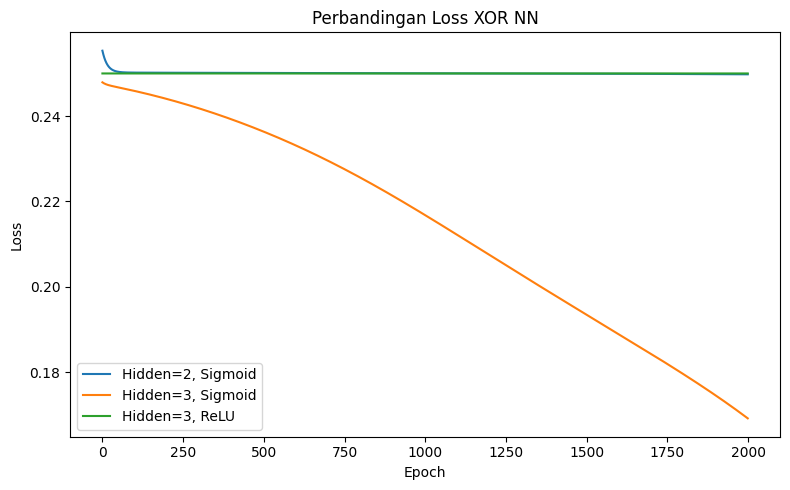

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_der(x):
    return (x > 0).astype(float)

# Training function
def train(hidden_size, activation="sigmoid"):
    # Dataset XOR
    X = np.array([[0,0],[0,1],[1,0],[1,1]])
    y = np.array([[0],[1],[1],[0]])

    lr = 0.1

    # Inisialisasi bobot
    W1 = np.random.randn(2, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, 1)
    b2 = np.zeros((1, 1))

    losses = []

    for epoch in range(2000):
        # Forward
        z1 = X.dot(W1) + b1

        # pilih aktivasi
        if activation == "sigmoid":
            a1 = sigmoid(z1)
            d1 = sigmoid_der(a1)
        else:
            a1 = relu(z1)
            d1 = relu_der(z1)

        z2 = a1.dot(W2) + b2
        a2 = sigmoid(z2)

        # Error
        error = y - a2
        losses.append(np.mean(error**2))

        # Backprop
        d2 = error * sigmoid_der(a2)

        # Update W2, b2
        W2 += lr * a1.T.dot(d2)
        b2 += lr * np.sum(d2, keepdims=True)

        # Hidden
        d1_full = d2.dot(W2.T) * d1
        W1 += lr * X.T.dot(d1_full)
        b1 += lr * np.sum(d1_full, axis=0, keepdims=True)

    return losses

# Train tiga model
loss_2_sigmoid = train(2, "sigmoid")
loss_3_sigmoid = train(3, "sigmoid")
loss_3_relu    = train(3, "relu")

# === Plot Visualisasi ===
plt.figure(figsize=(8,5))

plt.plot(loss_2_sigmoid, label="Hidden=2, Sigmoid")
plt.plot(loss_3_sigmoid, label="Hidden=3, Sigmoid")
plt.plot(loss_3_relu,    label="Hidden=3, ReLU")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Perbandingan Loss XOR NN")
plt.legend()
plt.tight_layout()
plt.show()
